In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Getting Datasets

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import os
os.chdir("/content/drive/Othercomputers/My Laptop/IITB/Projects/WiDS - IPL Analysis/Data")
matches=pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [87]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [88]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [89]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [90]:
balls=pd.read_csv("deliveries.csv")
balls.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [91]:
balls.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [92]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [93]:
balls.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

# Data Pre-processing

## Correction for Duplicaate teams name and city

In [94]:
matches.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
balls.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.replace({'M. Chinnaswamy Stadium' : 'M Chinnaswamy Stadium'},regex=True,inplace=True)
balls.replace({'M. Chinnaswamy Stadium' : 'M Chinnaswamy Stadium'},regex=True,inplace=True)
matches.replace({'M. A. Chidambaram Stadium' : 'MA Chidambaram Stadium, Chepauk'},regex=True,inplace=True)
balls.replace({'M. A. Chidambaram Stadium' : 'MA Chidambaram Stadium, Chepauk'},regex=True,inplace=True)
matches.replace({'Deccan Chargers' : 'Sunrisers Hyderabad'},regex=True,inplace=True)
matches.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.replace({'Bangalore':'Bengaluru'},regex=True,inplace=True)
balls.replace({'Bangalore':'Bengaluru'},regex=True,inplace=True)

## Dropping Insignificant Columns

In [95]:
matches=matches.drop(columns=['umpire3'],axis=1)
balls=balls.drop(columns=['player_dismissed','dismissal_kind','fielder'],axis=1)

## Dropping Insignificant Rows

In [96]:
matches=matches[matches['winner'].isna()==False]

## Filling Null values 

In [97]:
#Filling the values of city based on venue
conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium",matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
matches['city'] = np.where(matches['city'].isnull(),
                              np.select(conditions, values),
                              matches['city'])

In [98]:
print(matches.isnull().sum())
print(balls.isnull().sum())

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            2
umpire2            2
dtype: int64
match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64


### Now, our dataset has no null values.

## Converting Categorical Data into Numerical Data

In [99]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
matches["team1"]=encoder.fit_transform(matches["team1"])
matches["team2"]=encoder.fit_transform(matches["team2"])
matches["winner"]=encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["venue"]=encoder.fit_transform(matches["venue"])

In [100]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,11,10,10,field,normal,0,11,35,0,Yuvraj Singh,26,AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,6,9,9,field,normal,0,9,0,7,SPD Smith,19,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,2,5,5,field,normal,0,5,0,10,CA Lynn,29,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,9,3,3,field,normal,0,3,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin
4,5,2017,Bengaluru,2017-04-08,10,1,10,bat,normal,0,10,15,0,KM Jadhav,17,NaN,NaN


### Now, our dataset has No Null Values.

# ML TASK 1 - PREDICTING THE WINNER OF A MATCH

## Feature Engineering

In [101]:
#outcome variable team1_win as a probability of team1 winning the match
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0

#outcome variable team1_toss_win as a value of team1 winning the toss
matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0

#outcome variable team1_bat to depict if team1 bats first
matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"]=1 
matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,11,10,10,field,normal,0,11,35,0,Yuvraj Singh,26,AY Dandekar,NJ Llong,1.0,0.0,0
1,2,2017,Pune,2017-04-06,6,9,9,field,normal,0,9,0,7,SPD Smith,19,A Nand Kishore,S Ravi,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,2,5,5,field,normal,0,5,0,10,CA Lynn,29,Nitin Menon,CK Nandan,0.0,0.0,0
3,4,2017,Indore,2017-04-08,9,3,3,field,normal,0,3,0,6,GJ Maxwell,13,AK Chaudhary,C Shamshuddin,0.0,0.0,0
4,5,2017,Bengaluru,2017-04-08,10,1,10,bat,normal,0,10,15,0,KM Jadhav,17,NaN,NaN,1.0,1.0,1
5,6,2017,Hyderabad,2017-04-09,2,11,11,field,normal,0,11,0,9,Rashid Khan,26,A Deshmukh,NJ Llong,0.0,0.0,0
6,7,2017,Mumbai,2017-04-09,5,6,6,field,normal,0,6,0,4,N Rana,38,Nitin Menon,CK Nandan,0.0,0.0,0
7,8,2017,Indore,2017-04-10,10,3,10,bat,normal,0,3,0,8,AR Patel,13,AK Chaudhary,C Shamshuddin,0.0,1.0,1
8,9,2017,Pune,2017-04-11,1,9,9,field,normal,0,1,97,0,SV Samson,19,AY Dandekar,S Ravi,1.0,0.0,0
9,10,2017,Mumbai,2017-04-12,11,6,6,field,normal,0,6,0,4,JJ Bumrah,38,Nitin Menon,CK Nandan,0.0,0.0,0


In [102]:
#dataframe of related features
prediction_df=matches[["team1","team2","team1_toss_win","team1_bat","team1_win","dl_applied","venue"]]

#finding the higly correlated features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()
            
correlation_matrix

,team1,team2,team1_toss_win,team1_bat,dl_applied,venue
team1,1.000000,-0.145180,-0.046366,-0.046366,-0.024768,0.131948
team2,-0.145180,1.000000,0.001407,0.001407,-0.009859,0.058249
team1_toss_win,-0.046366,0.001407,1.000000,1.000000,-0.023953,0.043980
team1_bat,-0.046366,0.001407,1.000000,1.000000,-0.023953,0.043980
dl_applied,-0.024768,-0.009859,-0.023953,-0.023953,1.000000,-0.067483
venue,0.131948,0.058249,0.043980,0.043980,-0.067483,1.000000


In [103]:
#dropping the highly correlated features
prediction_df.drop(columns='team1_toss_win',inplace=True)
prediction_df

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,team1,team2,team1_bat,team1_win,dl_applied,venue
0,11,10,0,1.0,0,26
1,6,9,0,0.0,0,19
2,2,5,0,0.0,0,29
3,9,3,0,0.0,0,13
4,10,1,1,1.0,0,17
...,...,...,...,...,...,...
751,5,6,0,0.0,0,38
752,0,6,1,0.0,0,18
753,11,1,0,0.0,0,0
754,1,0,0,0.0,0,0


# Training the Model

## Splitting the Dataset into Training and Testing Data

In [104]:
from sklearn.model_selection import train_test_split

X=prediction_df.drop('team1_win', axis=1)
Y= prediction_df['team1_win'] 
Y=Y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Logistic Regression

In [105]:
#Logistic Regression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred1 = reg.predict(X_test)
log_acc=round(reg.score(X_test, y_test)*100,2)
print('Accuracy of Logistic Regression Classifier on test set:',(reg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.6357615894039735


In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.64      0.98      0.77        95
           1       0.60      0.05      0.10        56

    accuracy                           0.64       151
   macro avg       0.62      0.52      0.44       151
weighted avg       0.62      0.64      0.52       151



In [107]:
#confusion matrix of Logistic Regression model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[93,  2],
       [53,  3]])

## SVM

In [108]:
#SVM
from sklearn.svm import SVC
svm=SVC(random_state=0)
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)
svm_acc=round(svm.score(X_test,y_test)*100,2)
print('Accuracy of SVM Classifier on test set:',(svm.score(X_test, y_test)))

Accuracy of SVM Classifier on test set: 0.6158940397350994


In [109]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.64      0.89      0.75        95
           1       0.44      0.14      0.22        56

    accuracy                           0.62       151
   macro avg       0.54      0.52      0.48       151
weighted avg       0.57      0.62      0.55       151



In [110]:
#confusion matrix of SVC model
confusion_matrix(y_test, y_pred2)

array([[85, 10],
       [48,  8]])

## Random Forest

In [111]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
randomForest= RandomForestClassifier(n_estimators=100,random_state=0)
randomForest.fit(X_train,y_train)
y_pred3 = randomForest.predict(X_test)
rf_acc=round(randomForest.score(X_test,y_test)*100,2)
print('Accuracy of Random Forest Classifier on test set:',(randomForest.score(X_test, y_test)))

Accuracy of Random Forest Classifier on test set: 0.5496688741721855


In [112]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.66      0.59      0.62        95
           1       0.41      0.48      0.44        56

    accuracy                           0.55       151
   macro avg       0.53      0.54      0.53       151
weighted avg       0.57      0.55      0.56       151



In [113]:
#confusion matrix of Random Forest model
confusion_matrix(y_test, y_pred3)

array([[56, 39],
       [29, 27]])

## Decision Tree Classifier

In [114]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,y_train)
y_pred4 = dtree.predict(X_test)
dtree_acc=round(dtree.score(X_test,y_test)*100,2)
print('Accuracy of Decision Tree Classifier on test set:',dtree.score(X_test, y_test))

Accuracy of Decision Tree Classifier on test set: 0.5827814569536424


In [115]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        95
           1       0.45      0.52      0.48        56

    accuracy                           0.58       151
   macro avg       0.57      0.57      0.57       151
weighted avg       0.60      0.58      0.59       151



In [116]:
#confusion matrix of Decision Tree model
confusion_matrix(y_test, y_pred4)

array([[59, 36],
       [27, 29]])

### Accuracy Comparison

In [117]:
acc_comp=pd.DataFrame(columns=['Model','Accuracy (%)'])
acc_comp['Model']=['Logistic Regression','SVM','Random Forest','Decision Trees']
acc_comp['Accuracy (%)']=[log_acc,svm_acc,rf_acc,dtree_acc]
acc_comp

,Model,Accuracy (%)
0,Logistic Regression,63.58
1,SVM,61.59
2,Random Forest,54.97
3,Decision Trees,58.28


# ML TASK 2 - PREDICTING THE FINAL SCORE OF A MATCH

In [118]:
#Merging balls and matches dataset on id
matches=pd.read_csv("IPL Matches 2008-2020.csv")
balls=pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
dataset = pd.merge(matches,balls, on='id', how='right')
dataset.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [119]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['year'] = pd.DatetimeIndex(dataset['date']).year
dataset.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008


In [120]:
dataset['inning'] = dataset['id'].astype(str)+(dataset['batting_team']).astype(str)
dataset.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008


Getting Total Runs of an Inning

In [121]:
dataset_1 = dataset.copy()
dataset_1 = dataset_1.groupby(by=['inning']).sum()['total_runs'].reset_index()
dataset_1.head()

,inning,total_runs
0,1082591Royal Challengers Bangalore,172
1,1082591Sunrisers Hyderabad,207
2,1082592Mumbai Indians,184
3,1082592Rising Pune Supergiant,187
4,1082593Gujarat Lions,183


Merging innings dataset with the original dataset to get total score (total_runs_x) in the same dataset

In [122]:
dataset_2 = pd.merge(left=dataset_1, right=dataset, on='inning', how='right')
dataset_2.head()

,inning,total_runs_x,id,city,date,player_of_match,venue,neutral_venue,team1,team2,...,total_runs_y,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year
0,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,...,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982Kolkata Knight Riders,222,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,...,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008


Creating new columns for cumulative runs and wickets after every ball

In [123]:
work_set = pd.DataFrame()
list1=dataset['inning'].unique()
for i in range(len(list1)):
    one_inning = dataset_2.loc[dataset_2['inning']==list1[i]]
    one_inning = one_inning.sort_values(['over', 'ball'], ascending=[True, True])
    one_inning = one_inning[['over','ball','batsman_runs','total_runs_y','non_boundary','extra_runs','is_wicket','total_runs_x']].reset_index(drop=True)
    one_inning['Cumulative_runs'] = one_inning['total_runs_y'].cumsum()
    one_inning['Cumulative_wickets'] = one_inning['is_wicket'].cumsum()
    

    frame = [work_set,one_inning]
    work_set = pd.concat(frame)

In [124]:
dataset_2=work_set.copy()
dataset_2.head()

,over,ball,batsman_runs,total_runs_y,non_boundary,extra_runs,is_wicket,total_runs_x,Cumulative_runs,Cumulative_wickets
0,0,1,0,1,0,1,0,222,1,0
1,0,2,0,0,0,0,0,222,1,0
2,0,3,0,1,0,1,0,222,2,0
3,0,4,0,0,0,0,0,222,2,0
4,0,5,0,0,0,0,0,222,2,0


In [125]:
features = ['over','ball','batsman_runs','extra_runs','total_runs_y','non_boundary','is_wicket','Cumulative_runs','Cumulative_wickets']
dataset_2.tail()

,over,ball,batsman_runs,total_runs_y,non_boundary,extra_runs,is_wicket,total_runs_x,Cumulative_runs,Cumulative_wickets
107,17,6,1,1,0,0,0,157,154,4
108,18,1,1,1,0,0,0,157,155,4
109,18,2,1,1,0,0,0,157,156,4
110,18,3,0,0,0,0,1,157,156,5
111,18,4,1,1,0,0,0,157,157,5


Defining current over by merging over and current ball for one useful feature

In [126]:
dataset_2['curr_over']=dataset_2['over']+dataset_2['ball']/10
dataset_2=dataset_2[['curr_over','batsman_runs','total_runs_y','Cumulative_runs','Cumulative_wickets','total_runs_x']]
dataset_2.head()

,curr_over,batsman_runs,total_runs_y,Cumulative_runs,Cumulative_wickets,total_runs_x
0,0.1,0,1,1,0,222
1,0.2,0,0,1,0,222
2,0.3,0,1,2,0,222
3,0.4,0,0,2,0,222
4,0.5,0,0,2,0,222


### Getting New Data

In [127]:
new_data=pd.read_csv("ipl.csv")
new_data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


## Scaling and splitting the data

In [128]:
def accuracy(y_test,y_pred):
  correct=0
  acc=abs(y_test-y_pred).values
  for i in range(0,len(acc)):
    if acc[i]<=10:
      correct+=1
  return  ((correct/len(acc))*100)

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=new_data.iloc[:,[7,8,9,10,11,12,13]].values
Y=new_data['total']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression
Linreg=LinearRegression()
Linreg.fit(X1_train,y1_train)

LinearRegression()

In [131]:
lin_y_pred=Linreg.predict(X1_test)
score=Linreg.score(X1_test,y1_test)
print("The R-Squared value of the model is: ",round(score,2))
print("Accuracy: ",round(accuracy(y1_test,lin_y_pred),2),"%")
lin_acc=round(accuracy(y1_test,lin_y_pred),2)

The R-Squared value of the model is:  0.5
Accuracy:  45.06 %


## Random Forest

In [132]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X1_train,y1_train)
rf_y_pred=rf.predict(X1_test)
print("The R-Squared value of the model is ",round(rf.score(X1_test,y1_test),2))
print("Accuracy: ",round(accuracy(y1_test,rf_y_pred),2),"%")
rf1_acc=round(accuracy(y1_test,rf_y_pred),2)

The R-Squared value of the model is  0.69
Accuracy:  66.75 %


In [133]:
# importance of each features
importance=rf.feature_importances_
df_imp=pd.DataFrame(columns=['feature','importance'])
df_imp['feature']=['runs'	,'wickets'	,'overs',	'runs_last_5'	,'wickets_last_5' ,'striker'	,'non-striker']
df_imp['importance']=importance
df_imp

,feature,importance
0,runs,0.208332
1,wickets,0.167077
2,overs,0.139227
3,runs_last_5,0.239511
4,wickets_last_5,0.018779
5,striker,0.141501
6,non-striker,0.085574


## Support Vector Machine

In [134]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X1_train,y1_train)
svr_y_pred=svr.predict(X1_test)
print("The R-squared value of the model is ",round(svr.score(X1_test,y1_test),2))
print("Accuracy: ",round(accuracy(y1_test,svr_y_pred),2),"%")
svr_acc=round(accuracy(y1_test,svr_y_pred),2)

The R-squared value of the model is  0.47
Accuracy:  44.18 %


### Accuracy Comparison

In [135]:
acc_comp1=pd.DataFrame(columns=['Model','R-Sq','Accuracy (%)'])
acc_comp1['Model']=['Linear Regression','Random Forest','SVM']
acc_comp1['R-Sq']=[round(score,2),round(rf.score(X1_test,y1_test),2),round(svr.score(X1_test,y1_test),2)]
acc_comp1['Accuracy (%)']=[lin_acc,rf1_acc,svr_acc]
acc_comp1

,Model,R-Sq,Accuracy (%)
0,Linear Regression,0.50,45.06
1,Random Forest,0.69,66.75
2,SVM,0.47,44.18


# Neural Networks

In [136]:
import torch
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
dataset1 = pd.read_csv("odi.csv")
dataset2 = pd.read_csv("t20.csv")
dataset3 = pd.read_csv("ipl.csv")
# dataset = pd.concat([dataset1,dataset2,dataset3])
dataset = dataset3.copy()
dataset = dataset.sample(frac=1).reset_index(drop=True)
print(dataset1.shape, dataset2.shape, dataset3.shape, dataset.shape)
#print(dataset.isna().sum())
dataset = dataset.iloc[:,[7,8,9,12,13,14]]
# df_train = dataset.iloc[:,[7,8,9,12,13,14]].values #Input features
# df_test = dataset.iloc[:, 14].values #Label
dataset_size = len(dataset)
split = int(np.floor((0.05) * dataset_size))
indices = list(range(len(dataset)))
# np.random.seed(random_seed)
# np.random.shuffle(indices)
df_train = dataset.iloc[split:,:]
df_test = dataset.iloc[:split,:]

# print(df_train.describe())
# print(df_test.shape)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train1 = sc.fit_transform(df_train.iloc[:,:-1])
df_train1 = pd.DataFrame(df_train1)
df_train1['label']  = df_train.iloc[:,-1].values/300
df_train = df_train1.copy()
#X_test = sc.transform(X_test)
# x = df_train.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_fit = min_max_scaler.fit(x)
# print(min_max_scaler.data_max_)
# x_scaled = min_max_scaler.fit_transform(x)
# df_train = pd.DataFrame(x_scaled)
df_train = pd.DataFrame(df_train)
df_train = df_train.astype(float)
display(df_train.head())

sc = StandardScaler()
df_test1 = sc.fit_transform(df_test.iloc[:,:-1])
df_test1 = pd.DataFrame(df_test1)
df_test1['label']  = df_test.iloc[:,-1].values/300
df_test = df_test1.copy()
# x = df_test.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df_test = pd.DataFrame(x_scaled)
df_test = pd.DataFrame(df_test)
df_test = df_test.astype(float)
display(df_test.head())

print('Size of training data :', df_train.shape[0])
print('Size of test data :', df_test.shape[0])

(350899, 15) (180777, 15) (76014, 15) (76014, 15)


,0,1,2,3,4,label
0,-1.472865,-1.198736,-1.643310,-1.193484,-0.821629,0.570000
1,0.063825,-1.198736,-0.742059,1.844071,0.381678,0.696667
2,0.391652,-0.206234,0.661812,0.648968,2.140357,0.470000
3,-0.489383,0.786268,-0.395424,-0.745320,-0.451381,0.336667
4,-1.472865,-1.198736,-1.677973,-1.093892,-0.821629,0.560000


,0,1,2,3,4,label
0,0.834877,-0.704483,0.598642,0.755487,-0.162712,0.656667
1,-0.162250,-0.704483,-0.465699,1.354434,-0.162712,0.616667
2,-0.894834,-0.208644,-0.980703,-0.642055,-0.444570,0.433333
3,-0.040153,2.270553,0.976312,-0.941528,-0.726429,0.336667
4,0.224391,-0.704483,0.117972,0.555838,1.246582,0.570000


Size of training data : 72214
Size of test data : 3800


In [137]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math,os
from numpy.random import choice

def mean_absolute_percentage_error(y_true, y_pred):
	return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def r2(y_true,y_pred):
    return roundup(r2_score(y_true,y_pred))

def mse(y_true,y_pred):
    return roundup(mean_squared_error(y_true,y_pred))

def mae(y_true,y_pred):
    return roundup(mean_absolute_error(y_true,y_pred))

def mape(y_true, y_pred):
    return roundup(mean_absolute_percentage_error(y_true,y_pred))

def roundup(a, digits=4):
    n = 10**-digits
    return round(math.ceil(a / n) * n, digits)

def isEven(num):
    if num%2 ==0:
        return True
    return False

def modLog(num):
    try:
        return log(num)
    except:
        return 0

def loadNumpy(name,path='.'):
    if ".npy" in name:
        fullPath = path+'/'+name
    else:
        fullPath = path+'/'+name+'.npy'
    return np.load(fullPath, allow_pickle=True)

In [138]:
class CustomDatasetFromCSV(Dataset):
    def __init__(self, data, transform=None):
        self.data = data 
        self.transforms =  transforms
        self.to_tensor = transforms.ToTensor()

    def __getitem__(self, index):
        target = self.data.iloc[index,-1]
        data_val = self.data.iloc[index,:-1]
        target = torch.tensor(target,dtype=torch.float32)
        data_val = torch.tensor(data_val,dtype=torch.float32) 
        return data_val,target

    def __len__(self):
        return len(self.data)


dataset_trainval = CustomDatasetFromCSV(df_train)
dataset_test = CustomDatasetFromCSV(df_test)
batch_size = 128
validation_split = 0.075
#test_split = .15
shuffle_dataset = True
random_seed= 42

dataset_size = len(dataset_trainval)
indices = list(range(dataset_size))
split = int(np.floor((validation_split) * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset_trainval, batch_size=batch_size, 
                                           sampler=train_sampler,drop_last=True)
validation_loader = torch.utils.data.DataLoader(dataset_trainval, batch_size=batch_size,
                                                sampler=valid_sampler,drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=128,
                                                drop_last=True)

In [139]:
class mymodel(torch.nn.Module):
    def __init__(self, D_in, H1, H2, H3, H4, H5, H6, D_out):
        """
        In the constructor we construct three nn.Linear instances that we will use
        in the forward pass.
        """
        super(mymodel, self).__init__()
        # self.input_linear = torch.nn.Linear(D_in, H)
        # self.output_linear = torch.nn.Linear(H, D_out)
        self.linear1 = nn.Linear(D_in, H1)
        self.norm1 = nn.BatchNorm1d(H1)
        self.linear2 = nn.Linear(H1, H2)
        self.norm2 = nn.BatchNorm1d(H2)
        self.linear3 = nn.Linear(H2, H3)
        self.norm3 = nn.BatchNorm1d(H3)
        self.linear4 = nn.Linear(H3, H4)
        self.norm4 = nn.BatchNorm1d(H4)
        self.linear5 = nn.Linear(H4, H5)
        self.linear6 = nn.Linear(H5, H6)
        self.linear7 = nn.Linear(H6, D_out)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.leaky_relu(self.norm1(self.linear1(x)))
        x = F.leaky_relu(self.norm2(self.linear2(x)))
        x = F.leaky_relu(self.norm3(self.linear3(x)))
        x = F.leaky_relu(self.norm4(self.linear4(x)))
        x = F.leaky_relu(self.linear5(x))
        x = F.leaky_relu(self.linear6(x))
        x = self.linear7(x)
        #print(x.shape[0])
        return x.view(batch_size)
        # x = x.view(x.shape[0])
        # return x            

In [140]:
D_in, H1, H2, H3, H4, H5, H6, D_out = 5, 64, 128, 256, 128, 128, 64, 1

In [141]:
print(len(train_loader))
print(len(validation_loader))
print(len(test_loader))

521
42
29


In [142]:
def custom_accuracy(y_test,y_pred,thresold=10):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return (right)

In [143]:
model = mymodel(D_in, H1, H2, H3, H4, H5, H6, D_out)
print(model)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
if torch.cuda.is_available():
    model.to('cuda')

mymodel(
  (linear1): Linear(in_features=5, out_features=64, bias=True)
  (norm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=64, out_features=128, bias=True)
  (norm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear3): Linear(in_features=128, out_features=256, bias=True)
  (norm3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear4): Linear(in_features=256, out_features=128, bias=True)
  (norm4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear5): Linear(in_features=128, out_features=128, bias=True)
  (linear6): Linear(in_features=128, out_features=64, bias=True)
  (linear7): Linear(in_features=64, out_features=1, bias=True)
)


In [144]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 100,609 trainable parameters


In [145]:
%%time
step = 0
epochs = 200
train_loss_list = []
valid_loss_list = []
train_acc_l = []
val_acc_l = []
validation_acc_l = []

for e in range(epochs):
    running_loss_train = 0 
    running_loss_valid = 0
    validation_r2 = 0
    train_r2 = 0


    for inputs, labels in enumerate(train_loader):

        # Clear the gradients of all optimized tensors
        #print(inputs)
        #print(inputs,labels)
        optimizer.zero_grad()
        if torch.cuda.is_available():
            inputs, labels = inputs.to('cuda'), labels.to('cuda')   
        else:
            inputs, labels =labels        
        # Forward pass
        model.train()
        #print(type(inputs))
        outputs = model.forward(inputs)
        predicted = outputs.data
        #print(predicted,labels)
        #print(labels,predicted)
        #print(predicted,labels)
    
        #print(predicted,labels)

        #training_total += labels.size(0)
                
        train_loss = criterion(outputs, labels)
        train_r2_ =  r2(outputs.detach().cpu().numpy(), labels.detach().cpu().numpy())
        #training_correct += r2_loss
        
        #train_acc = training_correct
        # Backward pass
        train_loss.backward()
        optimizer.step()
        
        # Calculate and print running training loss
        running_loss_train += train_loss.item()  
        train_r2 +=  train_r2_
    validation_correct = 0
    validation_total = 0

        
    with torch.no_grad():    
            #count=0         
            # Iterate over the entire validation dataset
            for input_images2, labels2 in validation_loader:
                
                # Enable CUDA: use GPUs for model computation
                #count+=1
                #print(count)
                if torch.cuda.is_available():
                    input_images2, labels2 = input_images2.to('cuda'), labels2.to('cuda')
                
                # Make predictions 
                outputs2 = model.forward(input_images2)
                predicted2 = outputs2.data
                #print(predicted2,labels2)
                valid_r2_ =  r2(outputs2.detach().cpu().numpy(), labels2.detach().cpu().numpy())
                # Count total and correct predictions
                validation_total += labels2.size(0)
                validation_correct += custom_accuracy(labels2,predicted2,10/300)  
                #val_acc = custom_accuracy(labels2,predicted2)
                valid_loss = criterion(outputs2, labels2)
                # val_acc = validation_correct / validation_total
                running_loss_valid += valid_loss.item()  
                validation_r2 +=  valid_r2_

    val_acc = validation_correct / validation_total

    print("Epoch: {}/{}... ".format(e+1, epochs),
          "| Train Loss: {:.4f}".format(running_loss_train/len(train_loader)),
          "| Val Loss: {:.4f}".format(running_loss_valid/len(validation_loader)),
          "| Train R2: {:.4f}".format(train_r2/len(train_loader)),
          "| Val R2: {:.4f}".format(validation_r2/len(validation_loader)),
          "| Val Acc: {:.4f} %".format(val_acc*100))
    train_loss_list.append(running_loss_train/len(train_loader))
    valid_loss_list.append(running_loss_valid/len(validation_loader))
    train_acc_l.append(train_r2/len(train_loader))
    val_acc_l.append(validation_r2/len(validation_loader))
    validation_acc_l.append(val_acc*100)

          
    running_loss_train = 0
    running_loss_valid = 0

Epoch: 1/200...  | Train Loss: 0.0072 | Val Loss: 0.0050 | Train R2: -0.5495 | Val R2: 0.0795 | Val Acc: 42.0201 %
Epoch: 2/200...  | Train Loss: 0.0050 | Val Loss: 0.0046 | Train R2: 0.0765 | Val R2: 0.0673 | Val Acc: 42.5223 %
Epoch: 3/200...  | Train Loss: 0.0048 | Val Loss: 0.0062 | Train R2: 0.0854 | Val R2: 0.1969 | Val Acc: 34.4308 %
Epoch: 4/200...  | Train Loss: 0.0047 | Val Loss: 0.0042 | Train R2: 0.1154 | Val R2: 0.2356 | Val Acc: 47.8237 %
Epoch: 5/200...  | Train Loss: 0.0046 | Val Loss: 0.0041 | Train R2: 0.1223 | Val R2: 0.1136 | Val Acc: 48.3073 %
Epoch: 6/200...  | Train Loss: 0.0045 | Val Loss: 0.0043 | Train R2: 0.1358 | Val R2: -0.0466 | Val Acc: 46.7634 %
Epoch: 7/200...  | Train Loss: 0.0045 | Val Loss: 0.0043 | Train R2: 0.1476 | Val R2: -0.0347 | Val Acc: 47.4144 %
Epoch: 8/200...  | Train Loss: 0.0044 | Val Loss: 0.0043 | Train R2: 0.1553 | Val R2: 0.2016 | Val Acc: 46.0565 %
Epoch: 9/200...  | Train Loss: 0.0044 | Val Loss: 0.0045 | Train R2: 0.1647 | Val R2:

In [146]:
with torch.no_grad(): 
      model.eval()  
      test_total=0 
      test_correct=0
      for input_images3, labels3 in test_loader:

          if torch.cuda.is_available():
              input_images3, labels3 = input_images3.to('cuda'), labels3.to('cuda')
          
          outputs3= model.forward(input_images3)
          predicted3 = outputs3.data
          #print(predicted3, labels3)
          test_r2_ =  r2(outputs3.detach().cpu().numpy(), labels3.detach().cpu().numpy())
          test_total += labels3.size(0)
          test_correct += custom_accuracy(labels3,predicted2,40/300) 
          #print(test_correct)
          test_r2_ +=  test_r2_

In [147]:
test_acc = test_correct/test_total*100
test_r2 = test_r2_/test_total
print(test_acc,test_r2)

71.60560344827587 0.00029418103448275863


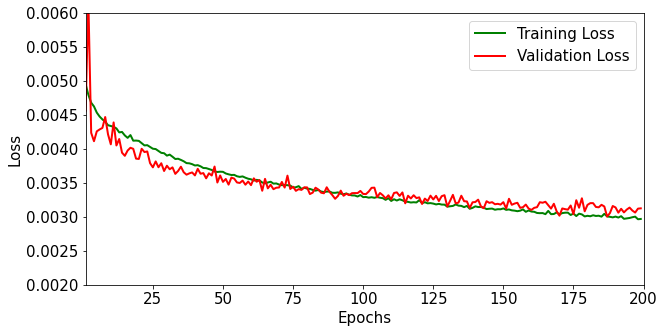

In [148]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(train_loss_list,c='g',label="Training Loss",linewidth=2)
plt.plot(valid_loss_list,c='r',label="Validation Loss",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(1,200)
plt.ylim(0.0020,0.0060)
plt.legend()
plt.show()

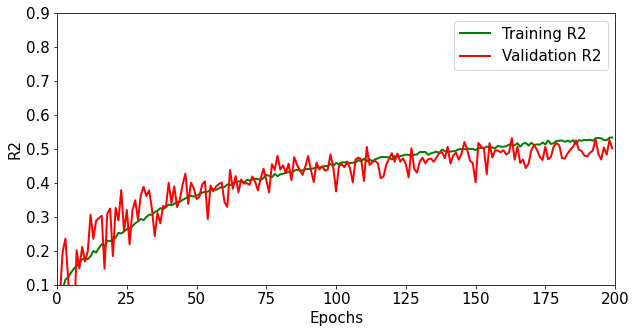

In [149]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(train_acc_l[0:],c='g',label="Training R2",linewidth=2)
plt.plot(val_acc_l[0:],c='r',label="Validation R2",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.xlim(0,200)
plt.ylim(0.1,0.9)
plt.legend()
plt.show()

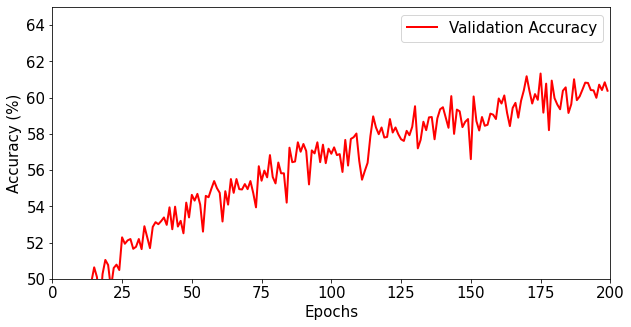

In [150]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
# train_loss_list2 = [x/len(train_loader) for x in train_loss_list]
# valid_loss_list2 = [x/len(validation_loader) for x in valid_loss_list]
plt.plot(validation_acc_l[0:],c='r',label="Validation Accuracy",linewidth=2)
#plt.plot(val_acc_l[5:],c='r',label="Validation R2",linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xlim(0,200)
plt.ylim(50,65)
plt.legend()
plt.show()

In [151]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 23.9 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 29.6 MB/s eta 0:00:00
  Created wheel for pandas-profiling: filename=pandas_profiling-0.0.dev0-py2.py3-none-any.whl size=328849 sha256=720c79c0fbabc296498e26b94f5664d98d5be4425d7a30f646fc5d4cb2fcfc2d
  Stored in directory: /tmp/pip-ephem-wheel-cache-fm5i48w7/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 

In [152]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [153]:
matches=pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [154]:
profile = ProfileReport(matches)
profile

Output hidden; open in https://colab.research.google.com to view.